### Galáxias barradas e interações 1

Este notebook possui cálculos para melhor caracterizar galáxias barradas interagindo com um satélite (galáxia anã). Os cálculos aqui apresentados são de: velocidade circular do satélite, órbita do satélite, mapa de alturas... Algumas funções importadas estão escritas em bar_funcs.py

Andressa Wille, 27/04/2023

Aqui estamos usando:

    - Galáxia com 75% de gás relaxado com SF e 20% de bojo
    - Galáxia sem gás, com 20% de bojo
    
    +
    
    - Galáxias anãs satélites
    
com massas $ M = 1 \times 10^{10}\mathrm{{M}_\odot}, M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, M = 0.1 \times 10^{10}\mathrm{{M}_\odot}$ e raios orbitais de $r = 10 \, \mathrm{kpc}, r = 20 \, \mathrm{kpc}, r = 30 \, \mathrm{kpc}$.

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy import stats
import math
from bar_funcs import *
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [3]:
#caminhos
path_nogas = 'snapshotJoiner/snapshot_160_b.hdf5'
path_gas = 'snapshotJoiner/snapshot_160_nb.hdf5'
paths = [path_nogas, path_gas]

In [4]:
n_snapshots = 281

In [5]:
#arrays para tempo
time_20 = np.empty(n_snapshots)
time_75r = np.empty(n_snapshots)

In [6]:
#arrays para velocidade circular
v_c_disk_75r = r_disk_75r = np.empty(n_snapshots)
v_c_halo_75r = r_halo_75r = np.empty(n_snapshots)
v_c_gas_75r = r_gas_75r = np.empty(n_snapshots)
v_c_star_75r = r_star_75r = np.empty(n_snapshots)
v_c_bulge_75r = r_bulge_75r = np.empty(n_snapshots)

v_c_disk_20 = r_disk_20 = np.empty(n_snapshots)
v_c_halo_20 = r_halo_20 = np.empty(n_snapshots)
v_c_bulge_20 = r_bulge_20 = np.empty(n_snapshots)

velocidade circular

In [7]:
for p, path in enumerate(paths):
    snapshot = path #8 Gyr

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    #ler info halo
    f_halo = f['PartType1']

    x_halo = np.array(f_halo['Coordinates'][:,0])
    y_halo = np.array(f_halo['Coordinates'][:,1])
    z_halo = np.array(f_halo['Coordinates'][:,2])
    m_halo = np.array(f_halo['Masses'])
    
    #corrigir posição
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    x_new_halo, y_new_halo, z_new_halo = shift_com(m_halo, x_halo, y_halo, z_halo)
    
    #ler info bojo
    f_bulge = f['PartType3']

    x_bulge = np.array(f_bulge['Coordinates'][:,0])
    y_bulge = np.array(f_bulge['Coordinates'][:,1])
    z_bulge = np.array(f_bulge['Coordinates'][:,2])
    m_bulge = np.array(f_bulge['Masses'])
    
    #corrigir posição
    x_new_bulge, y_new_bulge, z_new_bulge = shift_com(m_bulge, x_bulge, y_bulge, z_bulge)

    #se a galáxia também tem gás e estrelas:
    if p == 1:

        #ler info gas
        f_gas = f['PartType0']

        x_gas = np.array(f_gas['Coordinates'][:,0])
        y_gas = np.array(f_gas['Coordinates'][:,1])
        z_gas = np.array(f_gas['Coordinates'][:,2])
        m_gas = np.array(f_gas['Masses'])
        
        x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
        
        #ler info estrelas se o snapshot não for 0
        f_star = f['PartType4']

        x_star = np.array(f_star['Coordinates'][:,0])
        y_star = np.array(f_star['Coordinates'][:,1])
        z_star = np.array(f_star['Coordinates'][:,2])
        m_star = np.array(f_star['Masses'])
        
        #corrigir posição
        x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
        

    #calcular velocidade circular
    G = 43007.1
    if p == 0:
        v_c_disk_20, r_disk_20, M_r_disk_20 = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=40.0, Nbins=80)
        v_c_halo_20, r_halo_20, M_r_halo_20 = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=40.0, Nbins=80)
        v_c_bulge_20, r_bulge_20, M_r_bulge_20 = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=40.0, Nbins=80)
        
        M_r_tot_20 = (M_r_disk_20 + M_r_halo_20+M_r_bulge_20)
        v_c_20 = (np.sqrt(G*M_r_tot_20/r_disk_20))
        
    if p == 1:
        v_c_disk_75r, r_disk_75r, M_r_disk_75r = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=40.0, Nbins=80)
        v_c_halo_75r, r_halo_75r, M_r_halo_75r = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=40.0, Nbins=80)
        v_c_bulge_75r, r_bulge_75r, M_r_bulge_75r = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=40.0, Nbins=80)
        v_c_gas_75r, r_gas_75r, M_r_gas_75r = v_circ_comp(m=m_gas, x=x_new_gas, y=y_new_gas, 
                                                     z=z_new_gas, Rmax=40.0, Nbins=80)
        v_c_star_75r, r_star_75r, M_r_star_75r = v_circ_comp(m=m_star, x=x_new_star, y=y_new_star,
                                                             z=z_new_star, Rmax=40.0, Nbins=80)
        
        #M_r_tot_75r = (M_r_disk_75r + M_r_halo_75r + M_r_bulge_75r + M_r_gas_75r)
        M_r_tot_75r = (M_r_disk_75r + M_r_halo_75r + M_r_bulge_75r + M_r_gas_75r + M_r_star_75r)
        v_c_75r = (np.sqrt(G*M_r_tot_75r/r_disk_75r))

In [8]:
print('Galáxia não barrada:')
raio10 = np.where(r_disk_75r == 10.0)
vel10 = round(float(v_c_75r[raio10]),2)
print(f'Se r = 12 kpc, v = {vel10} km/s')

raio20 = np.where(r_disk_75r == 20.0)
vel20 = round(float(v_c_75r[raio20]),2)
print(f'Se r = 20 kpc, v = {vel20} km/s')

raio30 = np.where(r_disk_75r == 30.0)
vel30 = round(float(v_c_75r[raio30]),2)
print(f'Se r = 30 kpc, v = {vel30} km/s')

Galáxia não barrada:
Se r = 12 kpc, v = 165.11 km/s
Se r = 20 kpc, v = 171.13 km/s
Se r = 30 kpc, v = 169.21 km/s


In [9]:
print('Galáxia barrada:')
raio10b = np.where(r_disk_20 == 10.0)
vel10b = round(float(v_c_20[raio10b]),2)
print(f'Se r = 10 kpc, v = {vel10b} km/s')

raio20b = np.where(r_disk_20 == 20.0)
vel20b = round(float(v_c_20[raio20b]),2)
print(f'Se r = 20 kpc, v = {vel20b} km/s')

raio30b = np.where(r_disk_20 == 30.0)
vel30b = round(float(v_c_20[raio30b]),2)
print(f'Se r = 30 kpc, v = {vel30b} km/s')

Galáxia barrada:
Se r = 10 kpc, v = 166.2 km/s
Se r = 20 kpc, v = 171.0 km/s
Se r = 30 kpc, v = 168.81 km/s


In [10]:
r = [r_disk_20, r_disk_75r]
v_c_disk = [v_c_disk_20, v_c_disk_75r]
v_c_halo = [v_c_halo_20, v_c_halo_75r]
v_c_bulge = [v_c_bulge_20, v_c_bulge_75r]
v_c_gas = [0, v_c_gas_75r]
v_c_star = [0, v_c_star_75r]
v_c = [v_c_20, v_c_75r]

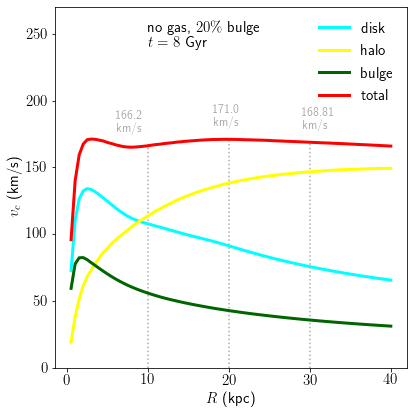

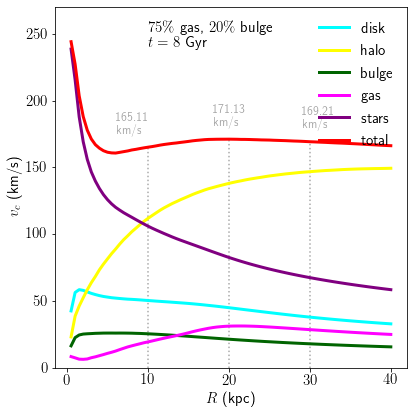

In [12]:
for i in range (0, 2):
    if i == 0:
        plt.figure(figsize=[6,6])
        plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
        plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
        plt.plot(r[i], v_c_bulge[i], color='darkgreen', lw=3, label='bulge')
        plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
        plt.xlabel('$R$ (kpc)', fontsize=15)
        plt.ylabel('$v_c$ (km/s)', fontsize=15)
        plt.legend(frameon=False)
        plt.ylim(0, 270)
    
        text ='no gas, $20\%$ bulge\n $t=8$ Gyr'
        plt.text(10, 240, text, fontsize=15)
        
        plt.vlines(10, 0, vel10b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel10b}\n km/s', xy=(6, vel10b+10), fontsize=12, color='darkgrey')
        plt.vlines(20, 0, vel20b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel20b}\n km/s', xy=(18, vel20b+10), fontsize=12, color='darkgrey')
        plt.vlines(30, 0, vel30b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel30b}\n km/s', xy=(29, vel30b+10), fontsize=12, color='darkgrey')

    if i == 1:
        plt.figure(figsize=[6,6])
        plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
        plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
        plt.plot(r[i], v_c_bulge[i], color='darkgreen', lw=3, label='bulge')
        plt.plot(r[i], v_c_gas[i], color='magenta', lw=3, label='gas')
        plt.plot(r[i], v_c_star[i], color='purple', lw=3, label='stars')
        plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
        plt.xlabel('$R$ (kpc)', fontsize=15)
        plt.ylabel('$v_c$ (km/s)', fontsize=15)
        plt.legend(frameon=False)
        plt.ylim(0, 270)
    
        text ='$75\%$ gas, $20\%$ bulge\n $t=8$ Gyr'
        plt.text(10, 240, text, fontsize=15)
        
        plt.vlines(10, 0, vel10, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel10}\n km/s', xy=(6, vel10+10), fontsize=12, color='darkgrey')
        plt.vlines(20, 0, vel20, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel20}\n km/s', xy=(18, vel20+10), fontsize=12, color='darkgrey')
        plt.vlines(30, 0, vel30, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel30}\n km/s', xy=(29, vel30+10), fontsize=12, color='darkgrey')

    
    plt.tight_layout()
    #plt.savefig(f'vc_sat{i}.png')

check centro de massa

In [ ]:
for p, path in enumerate(paths):
    snapshot = path #'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    time = round(f['Header'].attrs['Time'], 2)
    
    #ler info disco e calcular COM
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    cm_x, cm_y, cm_z = com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
    
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    
    cm_vx, cm_vy, cm_vz = com(m=m_disk, x=vx_disk, y=vy_disk, z=vz_disk)
    
    if p == 0:
        print(f'Centro de massa da galáxia barrada em {time} Gyr:')
        print(f'x = {cm_x} kpc\ny = {cm_y} kpc\nz = {cm_z} kpc')
        print(f'vx = {cm_vx} km/s\nvy = {cm_vy} km/s\nvz = {cm_vz} km/s \n')
    if p == 1:
        print(f'Centro de massa da galáxia não barrada em {time} Gyr:')
        print(f'x = {cm_x} kpc\ny = {cm_y} kpc\nz = {cm_z} kpc')
        print(f'vx = {cm_vx} km/s\nvy = {cm_vy} km/s\nvz = {cm_vz} km/s \n')

órbita

In [3]:
#caminhos
path_01_10 = 'sat01-10/'
path_01_20 = 'sat01-20/'
path_01_30 = 'sat01-30/'
path_05_10 = 'sat05-10/'
path_05_20 = 'sat05-20/'
path_05_30 = 'sat05-30/'
path_1_10 = 'sat1-10/'
path_1_20 = 'sat1-20/'
path_1_30 = 'sat1-30/'
paths = [path_01_10, path_01_20, path_01_30, path_05_10, path_05_20, path_05_30, path_1_10, path_1_20, path_1_30]

In [4]:
n_snapshots = 120

In [17]:
cm_x_01_10 = np.empty(n_snapshots)
cm_y_01_10 = np.empty(n_snapshots)
cm_z_01_10 = np.empty(n_snapshots)

cm_x_01_20 = np.empty(n_snapshots)
cm_y_01_20 = np.empty(n_snapshots)
cm_z_01_20 = np.empty(n_snapshots)

cm_x_01_30 = np.empty(n_snapshots)
cm_y_01_30 = np.empty(n_snapshots)
cm_z_01_30 = np.empty(n_snapshots)

cm_x_05_10 = np.empty(n_snapshots)
cm_y_05_10 = np.empty(n_snapshots)
cm_z_05_10 = np.empty(n_snapshots)

cm_x_05_20 = np.empty(n_snapshots)
cm_y_05_20 = np.empty(n_snapshots)
cm_z_05_20 = np.empty(n_snapshots)

cm_x_05_30 = np.empty(n_snapshots)
cm_y_05_30 = np.empty(n_snapshots)
cm_z_05_30 = np.empty(n_snapshots)

cm_x_1_10 = np.empty(n_snapshots)
cm_y_1_10 = np.empty(n_snapshots)
cm_z_1_10 = np.empty(n_snapshots)

cm_x_1_20 = np.empty(n_snapshots)
cm_y_1_20 = np.empty(n_snapshots)
cm_z_1_20 = np.empty(n_snapshots)

cm_x_1_30 = np.empty(n_snapshots)
cm_y_1_30 = np.empty(n_snapshots)
cm_z_1_30 = np.empty(n_snapshots)

In [18]:
for p, path in enumerate(paths):
    snapshot = path + 'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        if p == 0:
            cm_x_01_10[j], cm_y_01_10[j], cm_z_01_10[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 1:
            cm_x_01_20[j], cm_y_01_20[j], cm_z_01_20[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 2:
            cm_x_01_30[j], cm_y_01_30[j], cm_z_01_30[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 3:
            cm_x_05_10[j], cm_y_05_10[j], cm_z_05_10[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 4:
            cm_x_05_20[j], cm_y_05_20[j], cm_z_05_20[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 5:
            cm_x_05_30[j], cm_y_05_30[j], cm_z_05_30[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 6:
            cm_x_1_10[j], cm_y_1_10[j], cm_z_1_10[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 7:
            cm_x_1_20[j], cm_y_1_20[j], cm_z_1_20[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 8:
            cm_x_1_30[j], cm_y_1_30[j], cm_z_1_30[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)

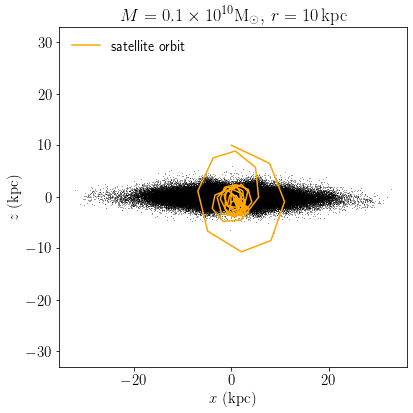

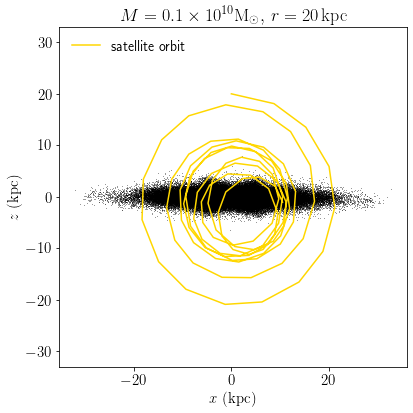

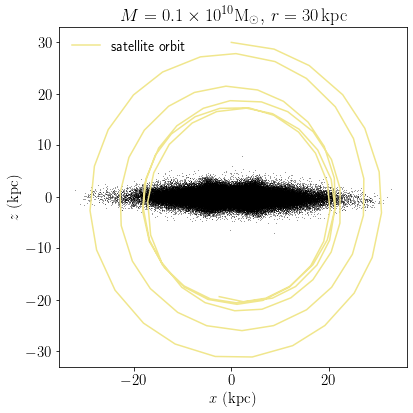

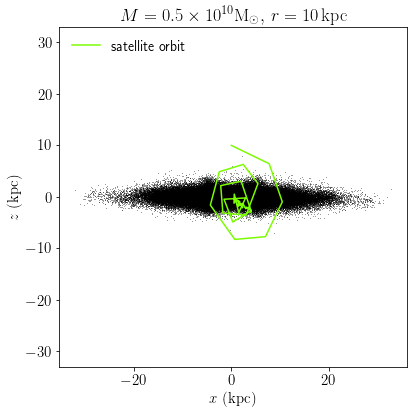

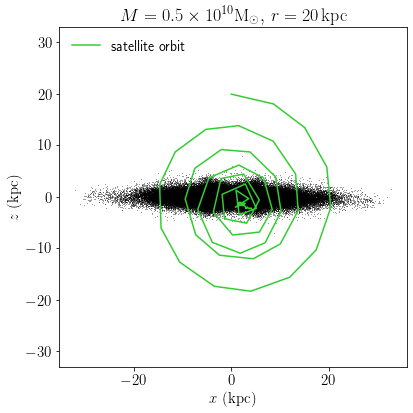

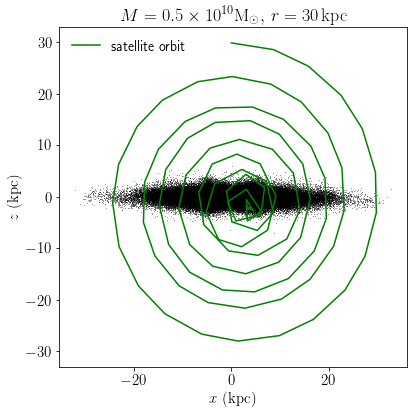

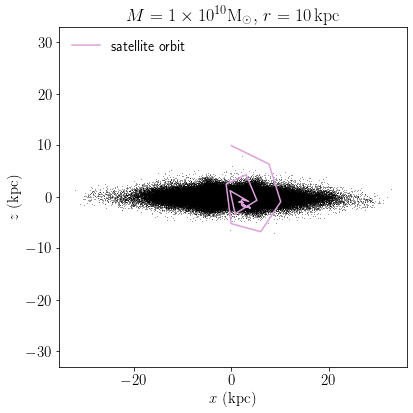

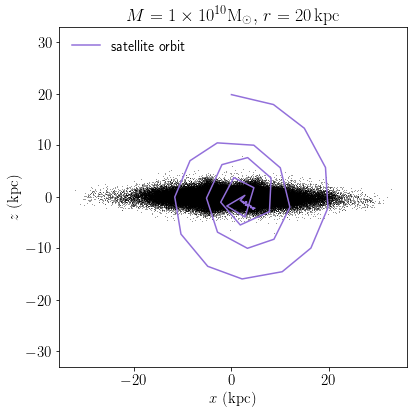

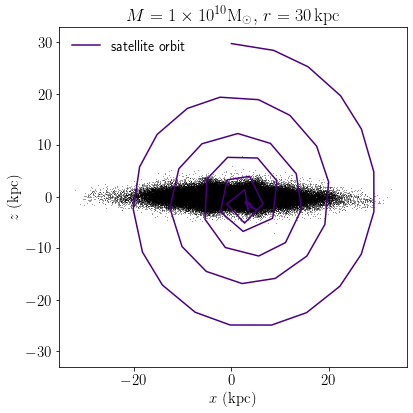

In [19]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_01_10, cm_z_01_10, color='orange', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-0.1-10.png')
        
    if i == 1:   
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_01_20, cm_z_01_20, color='gold', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-0.1-20.png')
    
    if i == 2:   
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_01_30, cm_z_01_30, color='khaki', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-0.1-30.png')
        
    if i == 3:   
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_05_10, cm_z_05_10, color='lawngreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-0.5-10.png')
        
    if i == 4:   
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_05_20, cm_z_05_20, color='limegreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-0.5-20.png')
    
    if i == 5:   
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_05_30, cm_z_05_30, color='green', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-0.5-30.png')
    
    if i == 6: 
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_1_10, cm_z_1_10, color='plum', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-1-10.png')
        
    if i == 7: 
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_1_20, cm_z_1_20, color='mediumpurple', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-1-20.png')
        
    if i == 8: 
        plt.figure(figsize=[6,6])
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_1_30, cm_z_1_30, color='indigo', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=15)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=15)
        plt.legend(loc='upper left', frameon=False, fontsize=14)
        plt.ylim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('orbita-1-30.png')

mapa de alturas

In [5]:
plt.rcParams['figure.figsize'  ] = (3.5,1.4)
plt.rcParams['font.size'       ] = 7
plt.rcParams['legend.fontsize' ] = 7
plt.rcParams['legend.frameon'  ] = False
plt.rcParams['font.family'     ] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction' ] = 'in'
plt.rcParams['ytick.direction' ] = 'in'
plt.rcParams['xtick.top'       ] = True
plt.rcParams['ytick.right'     ] = True
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['xtick.major.width'] = 0.75
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.major.width'] = 0.75
plt.rcParams['ytick.minor.width'] = 0

In [112]:
path_nogas = 'bojo20_200/'
path_gas = 'gas75_rel_200/'

In [34]:
#snapshots=[160,240,280]
snapshots=[0,60,120]

Qlist = []
Qlist1 = []
    
for s, snap in enumerate(snapshots): 
    index = str(snap).zfill(3)
    snapshot = path_1_30 + f'snapshot_{index}.hdf5' 
    #substituir o path, por enquanto só dá um de cada vez

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))
    

    t = round(f['Header'].attrs['Time'], 2)
        
    #corrigir posição - centro de massa
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
            
    #corrigir posição - momento angular
    Ltot = [0, 0, 0]
        
    for k in range (0, Ndisk):
        R = [(x_new_disk[k]), (y_new_disk[k]), (z_new_disk[k])]
        px = (m_disk[k] * vx_disk[k])
        py = (m_disk[k] * vy_disk[k])
        pz = (m_disk[k] * vz_disk[k])
        p = [px, py, pz]
        L = np.cross(R, p)
        Ltot = Ltot + L

    vetorZ = np.array([0, 0, 1])
    produto_interno = (Ltot[0] * vetorZ[0]) + (Ltot[1] * vetorZ[1]) + (Ltot[2] * vetorZ[2])
    produto_normas = ((Ltot[0]**2 + Ltot[1]**2 + Ltot[2]**2)**0.5) * ((vetorZ[0]**2 + vetorZ[1]**2 + vetorZ[2]**2)**0.5)
    cos_phi = produto_interno/produto_normas
    phi = math.acos(cos_phi)

    for k in range (0, Ndisk):
        x_new_disk_2 = np.sin(phi)*z_new_disk[k] + np.cos(phi)*x_new_disk[k]
        z_new_disk_2 = (-1) * np.cos(phi)*z_new_disk[k] + np.sin(phi)*x_new_disk[k]
        x_new_disk[k] = x_new_disk_2
        z_new_disk[k] = mean(z_new_disk_2) 

    #mapas de posição e velocidade
    Nbins = 50

    Rmax =  35.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk, y_new_disk, z_new_disk, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

    results1, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk, y_new_disk, vz_disk, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
    
    #mudar para statistic='std' para desvio de posição e velocidades

    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist.append(Q)
    Q1 = results1
    Qlist1.append(Q1)

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


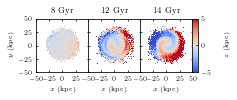

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.set_title("8 Gyr")
ax2.set_title("12 Gyr")
ax3.set_title("14 Gyr")

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest',
                 vmin=-5.0, vmax=5.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest', 
                 vmin=-5.0, vmax=5.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest', 
                 vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-50,50)
    ax.set_xticks(np.arange(-50,50,25))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-50,50)
    ax.set_yticks(np.arange(-50,50,25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax3.set_xticks(np.arange(-50,51,25))
ax1.set_yticks(np.arange(-50,51,25))

fig.subplots_adjust(right=0.9)

#cax1 = fig.add_axes([0.85, 0.27, 0.025, 0.54])
cax1 = fig.add_axes([0.81, 0.28, 0.020, 0.53])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$z$ (kpc)', labelpad=12)

fig.subplots_adjust(left=0.3, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
plt.tight_layout()
plt.savefig('mapz_1-30.png', dpi=200)

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


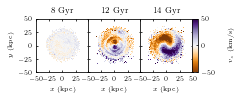

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.set_title("8 Gyr")
ax2.set_title("12 Gyr")
ax3.set_title("14 Gyr")

im1 = ax1.imshow(Qlist1[0].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest',
                 vmin=-50.0, vmax=50.0)
im2 = ax2.imshow(Qlist1[1].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest', 
                 vmin=-50.0, vmax=50.0)
im3 = ax3.imshow(Qlist1[2].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest', 
                 vmin=-50.0, vmax=50.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-50,50)
    ax.set_xticks(np.arange(-50,50,25))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-50,50)
    ax.set_yticks(np.arange(-50,50,25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax3.set_xticks(np.arange(-50,51,25))
ax1.set_yticks(np.arange(-50,51,25))

fig.subplots_adjust(right=0.9)

cax1 = fig.add_axes([0.81, 0.28, 0.020, 0.53])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$v_z$ (km/s)', labelpad=12)

fig.subplots_adjust(left=0.3, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
plt.tight_layout()
plt.savefig('mapvz_1-30.png', dpi=200)